# Classification using SVM

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os

Mean acc on test set 0.9993197278911564


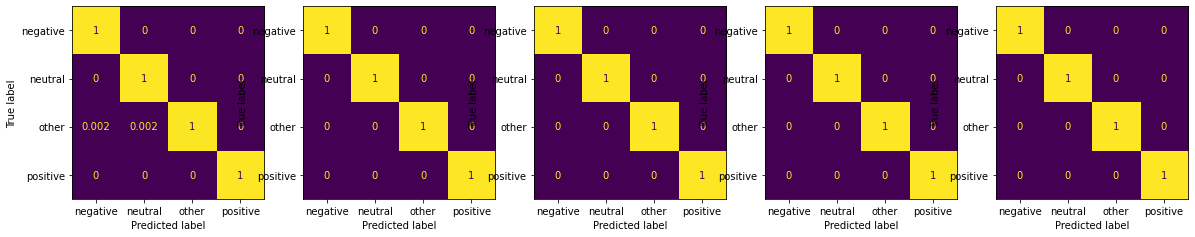

Mean acc on test set 1.0


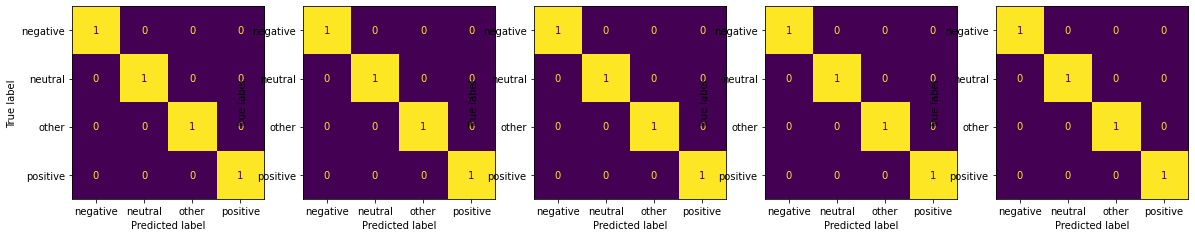

Mean acc on test set 0.9996598639455783


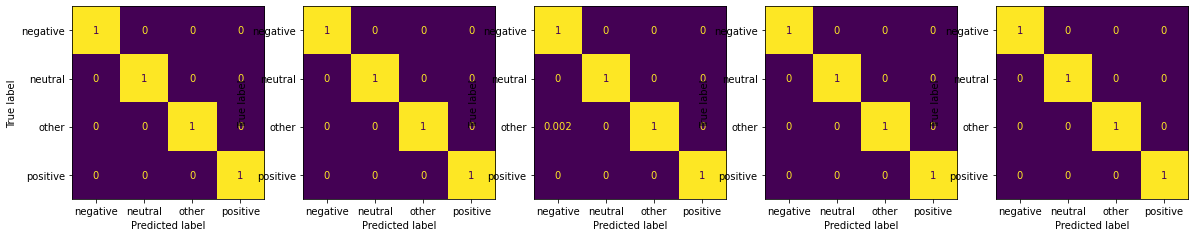

In [19]:
base_path = '/Users/frederikrogge/Data/compsci-project'
identfiers = [
    'KKL366_220124_deconvolved',
    'KKL366_220125_deconvolved',
    'KKL366_220126_deconvolved',
]

for ident in identfiers:

    # Get data
    data = np.load(os.path.join(base_path, ident + '_data.npy'), allow_pickle=True)
    labels = np.load(os.path.join(base_path, ident + '_labels.npy'), allow_pickle=True)

    # Pre-process
    data = np.max(data, axis=2)

    # Initialize k-fold
    kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    # Initialize figure
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))

    accs = []
    for fold, (train_ids, test_ids) in enumerate(kfold.split(data, labels)):

        # Get train and test data
        train_data, train_labels, test_data, test_labels = data[train_ids], labels[train_ids], data[test_ids], labels[test_ids]

        # Z-score
        scaler = StandardScaler()
        train_data= scaler.fit_transform(train_data)
        test_data = scaler.transform(test_data)

        # Train SVM
        clf = SVC(kernel='linear')
        clf.fit(train_data, train_labels)

        # Get predictions on test set
        test_predictions = clf.predict(test_data)

        # Determine accuracy
        acc = np.mean(test_predictions == test_labels)
        accs.append(acc)

        # Plot confusion matrix
        disp = ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, normalize='true', ax=axs[fold], colorbar=False)

    print('Mean acc on test set {}'.format(np.mean(accs)))
    plt.show()